# CA3 Naive Bayes Clasisfier
## Aria Fayyazi 810198453

In [1]:
from __future__ import unicode_literals
from matplotlib import pyplot as plt
from collections import Counter
from hazm import *
import pandas as pd
import operator
import math

## Question 1 :
#### In the cell below train data is read from train.csv and the results of several tests of stemming and lemmatization are shown on some words.
#### Stemming and lemmatization are methods to analyze the meaning behind a word. Stemming uses the stem of the word, while lemmatization uses the context in which the word is being used. We'll later go into more detailed explanations and examples.  
#### The main advantage of lemmatization is that it takes into consideration the context of the word not each letter in that word .
#### In the following I just use lemmatizing alone for pre processing.

In [2]:
df = pd.read_csv("train.csv")

stemmer = Stemmer()
print(stemmer.stem('می خورم'))
print(stemmer.stem('خوردن'))

lemmatizer = Lemmatizer()
print(lemmatizer.lemmatize('رفتی'))
print(lemmatizer.lemmatize('خوردم'))

می خور
خوردن
رفت#رو
خورد#خور


In [3]:
stop_words = stopwords_list()
stop_words.append('.')
stop_words.append('،')
stop_words.append('\n')
stop_words.append('\r')
stop_words.append('$NUM')
stop_words.append(':')
stop_words.append('(')
stop_words.append(')')
bad_chars = [';', ",",':', '!', "*" ,"^", '-', "_", "?", "{" , "}" , "#" , ">" , "+" , "@" , "`", "&" , "|" , "$" , "]"  , "=" , "(" , ")" , '"' ,'؟', "." , "[" , "/" ,'0','1','2','3','4','5','6','7','8','9','؛']
label = df['label'].unique()
label = list(label)
list_of_clases = list()

for i in range(len(label)):
    list_of_clases.append(dict())

#### In this cell, the number of repetitions of each word in each class is calculated from train data.

In [4]:
number_of_words_in_each_category = [0,0,0,0]
for i in range(1, len(df.index)):
    words_token = word_tokenize(str(df.iloc[i]["content"]))
    for word in words_token:
        word = lemmatizer.lemmatize(word)
        #word = stemmer.stem(word)
        if word not in stop_words and word not in bad_chars:
            for j in range(len(label)):
                if label[j] == df.iloc[i]['label']:
                    if word in list_of_clases[j]:
                        list_of_clases[j][word] += 1
                        number_of_words_in_each_category[j] +=1
                    else:
                        list_of_clases[j][word] = 1
                        number_of_words_in_each_category[j] = 1

## Question 6 :
#### Now we plot the number of repetition of top 10 words used in each categories

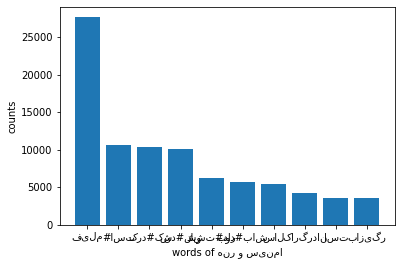

['فیلم', '#است', 'کرد#کن', 'شد#شو', 'داشت#دار', 'بود#باش', 'سال', 'کارگردان', 'است\u200c', 'بازیگر']


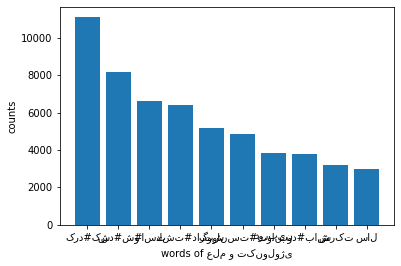

['کرد#کن', 'شد#شو', '#است', 'داشت#دار', 'گوش', 'توانست#توان', 'دوربین', 'بود#باش', 'شرکت', 'سال']


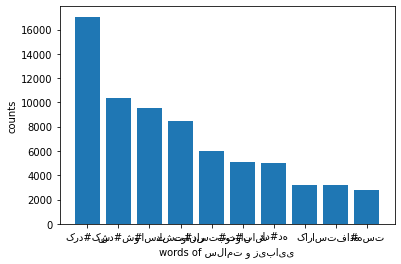

['کرد#کن', 'شد#شو', '#است', 'داشت#دار', 'توانست#توان', 'بود#باش', 'داد#ده', 'کار', 'استفاده', '#هست']


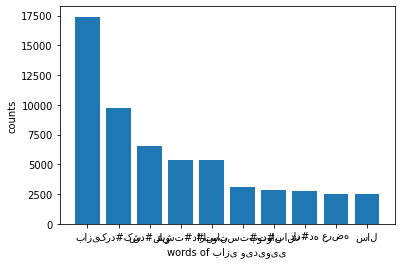

['بازی', 'کرد#کن', 'شد#شو', 'داشت#دار', '#است', 'توانست#توان', 'بود#باش', 'داد#ده', 'عرضه', 'سال']


In [5]:
words = []
def plotting():
    for i in range(len(label)):
        words.append([])
        sorted_words = sorted(list_of_clases[i].items(),reverse=True, key=operator.itemgetter(1))[0:10]
        words[i] = [sorted_words[i][0] for i in range(len(sorted_words))]
        counts = [sorted_words[i][1] for i in range(len(sorted_words))]
        plt.bar(words[i], counts)
        plt.xlabel(f"words of {label[i]}")
        plt.ylabel('counts')
        plt.show()
        print(words[i])
plotting()

## Question 6 :
#### In this cell we remove the words which are in top 10 words in all categories because they have no effect on identifying categories for the advertisements and plot them again.

 removed words are ['#است', 'کرد#کن', 'شد#شو', 'داشت#دار', 'بود#باش']


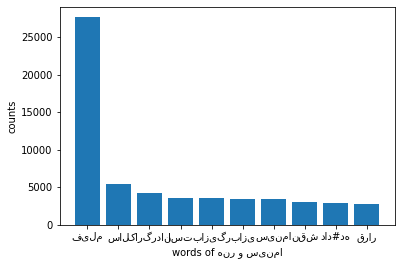

['فیلم', 'سال', 'کارگردان', 'است\u200c', 'بازیگر', 'بازی', 'سینما', 'نقش', 'داد#ده', 'قرار']


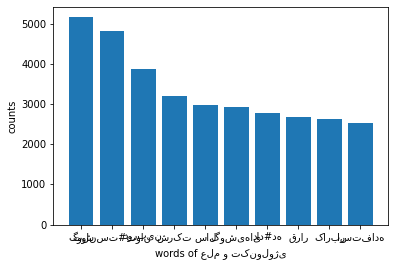

['گوش', 'توانست#توان', 'دوربین', 'شرکت', 'سال', 'گوشی\u200cهای', 'داد#ده', 'قرار', 'کاربر', 'استفاده']


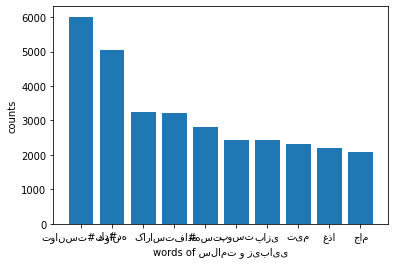

['توانست#توان', 'داد#ده', 'کار', 'استفاده', '#هست', 'پوست', 'بازی', 'تیم', 'غذا', 'جام']


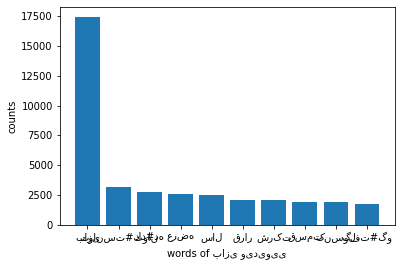

['بازی', 'توانست#توان', 'داد#ده', 'عرضه', 'سال', 'قرار', 'شرکت', 'قسمت', 'کنسول', 'گفت#گو']


In [6]:
most_seen_words = [j for i in words for j in i]
repeated = Counter(most_seen_words)
repeated_words = list([word for word in repeated if repeated[word] == 4])
print(f" removed words are {repeated_words}")
for i in range(len(label)):
    for word in repeated_words:
        list_of_clases[i].pop(word, None)
plotting()

## Question 3 : Example of two sentences which have the same word in a diffrent meaning :
#### 1) در خانه باز است
#### 2) باز یک پرنده شکاری است
#### which in the first sentence "باز" is meaning open while in the second sentence it means Falcon which is a bird name.
#### In this example if we use trigram then we can understand the meaning of "باز" in each sentence.
#### By using N_gram we can understand the relation between words in a sentence and then we can recognize the meaning of that word according to the words around it in the sentence.

## Question 2 : $ p(c|x) = \frac{p(x|c)p(c)}{p(x)} $
#### $ x $ : word that is in sentence .
#### $ c $ : each category.
#### $ p(x) $ or *Predictor prior probability* : probability of seeing word x in each category (or class) .
#### $ p(c) $ or *Class prior probability* :  probability of seeing an ad with category c which in our datas $ p(c) $ for all categories are equall to $ \frac{1}{4} $.
#### $ p(x|c) $ or *Likelihood* : probability of seeing word x in category (or class) of $c$ .
#### $ p(c|x) $ or *Posterior probability* : probability of the ad is in category $ c $ by seeing the word x in the sentence .

#### In the cell bellow the value of $ p(c|x) $ without additive smoothing is calculated for each row of test data .
## Question 4 :
#### Without additive smoothing : If the word $x_{i}$ is not appeard in our train data then the value of $ p(x_{i} | c) $ will be zero and thus $ p(c | x) $ will be zero so we cant classify that data because all of the probabilities will be equall to zero. or if a word is just appeared in one class then our model 100% will predict that the ad with that word is in that specified category which could be wrong . 
## Question 5 :
#### If we use additive smoothing then we dont have the problem explained above because in additive smoothing we calculate the $ p(c|x) = \frac{p(x|c)p(c) + 1}{p(x) + |V| + 1} $ which the value of $ p(c|x) $ will never been zero because of the +1 added in the nominator and denominator of the fraction which corresponds to the number of repetitions of a word we have not seen before .

In [7]:
test_df = pd.read_csv("test.csv")

def probability_without_additive_smoothing(bag_of_words):
    probabilities = [0,0,0,0]
    for word in bag_of_words:
        word = lemmatizer.lemmatize(word)
        if word not in stop_words:
            for j in range(len(label)):
                if word in list_of_clases[j]:
                    probabilities[j] += math.log(list_of_clases[j][word] / number_of_words_in_each_category[j])
                else:
                    probabilities[j] += -100000
    return probabilities


## Question 7 :
### why precision or recall alone is not enough for evaluating the model?
#### Let have a situation that we predicted 2 ad as vehicles and both of them are correct then the precision will be 100% but in real data there are 1000 ads with vehicles category which we just predicted 2 of them so if we just look at the precision then we would say its a realy good model but in fact this model is really bad one.
#### Let have another situation which we predict every category of each ad as vehicles then the recall of vehicles will be 100% but its a really bad model at all.
## Question 8 :
## F1 Score :
#### Now imagine that you have two classifiers — classifier A and classifier B — each with its own precision and recall. One has a better recall score, the other has better precision. We would like to say something about their relative performance. In other words, we would like to summarize the models’ performance into a single metric. That’s where F1-score are used. It’s a way to combine precision and recall into a single number. F1-score is computed using a mean (“average”), but not the usual arithmetic mean. It uses the harmonic mean . and because of that the F1-score gives a larger weight to lower numbers.
#### suppose that we have 50 ads with category of vehicles and we predict 45 of them as vehicles and the other 5 ads as an another categories so in this situation the accuracy of our model is 90% which is really good accuracy but that 5 ads which predicted as other categories will not shown in vehicles page which no one will see them if they want to buy vehicles s here we use F1 score to evaluate our model which gives a better measure of the incorrectly classified cases than the Accuracy Metric .
#### The explanation above is from https://towardsdatascience.com

## Without additive smoothing :
#### Now when we calculate the probabilities of $ p(c_{i}| phrase) $ for all $ c_{i} $ , then we predict the category's of that ad is equall to the max probability category we got .

In [8]:
correct_detected_class = [0,0,0,0]
all_detected_class = [0,0,0,0]
total_class = [0,0,0,0]

for i in range(len(test_df.index)):
    words_token = word_tokenize(test_df.iloc[i]["content"])
    probabilities = probability_without_additive_smoothing(words_token)
    best_prob = max(probabilities)
    for j in range(len(probabilities)):
        if best_prob == probabilities[j]:
            chosen_category = label[j]
            if chosen_category == test_df.iloc[i]["label"]:
                correct_detected_class[j] += 1
            all_detected_class[j] += 1
            total_class[label.index(test_df.iloc[i]["label"])] += 1
            break


all_correct_detected = sum(correct_detected_class)

accuracy = all_correct_detected / len(test_df)

precision = [correct_detected_class[i] / all_detected_class[i] for i in range(len(label))]
    
recall = [correct_detected_class[i] / total_class[i] for i in range(len(label))]

f_1 = [(2*precision[i] * recall[i] /(precision[i] + recall[i])) for i in range(len(label))]

print(f" Accuracy without additive smoothing is : {accuracy}")
print("-------------------------------------------------")
for i in range(4):
    print(f" precision without additive smoothing of category of {label[i]} is : {precision[i]}")
    print(f" recall without additive smoothing of category of {label[i]} is : {recall[i]}")
    print(f" f_1 without additive smoothing of category of {label[i]} is : {f_1[i]}")
    print("-------------------------------------------------")


 Accuracy without additive smoothing is : 0.9276807980049875
-------------------------------------------------
 precision without additive smoothing of category of هنر و سینما is : 0.9016393442622951
 recall without additive smoothing of category of هنر و سینما is : 0.9880239520958084
 f_1 without additive smoothing of category of هنر و سینما is : 0.9428571428571428
-------------------------------------------------
 precision without additive smoothing of category of علم و تکنولوژی is : 0.9652509652509652
 recall without additive smoothing of category of علم و تکنولوژی is : 0.9025270758122743
 f_1 without additive smoothing of category of علم و تکنولوژی is : 0.9328358208955224
-------------------------------------------------
 precision without additive smoothing of category of سلامت و زیبایی is : 0.8682634730538922
 recall without additive smoothing of category of سلامت و زیبایی is : 0.9006211180124224
 f_1 without additive smoothing of category of سلامت و زیبایی is : 0.88414634146341

## Question 9 :
#### Macro average : this a simple average which we divide sum of the precision or recall or F1 score to their size .
#### Micro average : micro average for precision is dividing sum of all true positives to sum of all true and false positves of all classes and the micro average for recall is sum of all true positives to sum of all true and false negatives of all classes which the value of sum of false negatives and false positives for all classes is equall so the value of micro average of recall and precision are same and thus the value of micro average of F1 score which is the harmonic average of micro recall and precision is the same as micro recall and precesion . And all of them are equall to the accuracy of the model.
#### Weighted average : its compeletly looks like macro average but we weight the precision or recall or F1 score of each class by the number of samples of that class which in our data number of samples of each class is equall to each other so the value of weighted average will be the same as macro average.

In [9]:
precision_macro = sum(precision)/len(precision)
recall_macro = sum(recall)/len(recall)
f_1_macro = sum(f_1)/len(f_1)

print(f"precision_macro without additive smoothing is {precision_macro}")
print(f"recall_macro without additive smoothing is {recall_macro}")
print(f"f_1_macro without additive smoothing is {f_1_macro}")
print("-------------------------------------------------")

precision_weighted = 300 * sum(precision)/(len(precision) * 300)
recall_weighted = 300 * sum(recall)/(len(recall) * 300)
f_1_weighted = 300 * sum(f_1)/(len(f_1)*300)

print(f"precision_weighted without additive smoothing is {precision_weighted}")
print(f"recall_weighted without additive smoothing is {recall_weighted}")
print(f"f_1_weighted without additive smoothing is {f_1_weighted}")
print("-------------------------------------------------")

precision_micro = sum(correct_detected_class)/sum(all_detected_class)
recall_micro = sum(correct_detected_class)/sum(total_class)
f_1_micro = (2 * precision_micro * recall_micro)/(precision_micro + recall_micro)

print(f"precision_micro without additive smoothing is {precision_micro}")
print(f"recall_micro without additive smoothing is {recall_micro}")
print(f"f_1_micro without additive smoothing is {f_1_micro}")
print("-------------------------------------------------")

precision_macro without additive smoothing is 0.9221304145537051
recall_macro without additive smoothing is 0.9312955745511924
f_1_macro without additive smoothing is 0.9258572622014558
-------------------------------------------------
precision_weighted without additive smoothing is 0.9221304145537051
recall_weighted without additive smoothing is 0.9312955745511924
f_1_weighted without additive smoothing is 0.9258572622014558
-------------------------------------------------
precision_micro without additive smoothing is 0.9276807980049875
recall_micro without additive smoothing is 0.9276807980049875
f_1_micro without additive smoothing is 0.9276807980049875
-------------------------------------------------


## Question 10 : Results without Additive smoothing : 

| - | Video Games | Health Beauty | Science Technology | Art Cinema | All Classes |
| --- | --- | --- | --- | --- | --- |
| Precision | 0.95 | 0.87 | 0.97 | 0.90 | - |
| Recall | 0.93 | 0.90 | 0.90 | 0.99 | - |
| F1-score | 0.94 | 0.88 | 0.93 | 0.94 | - |
| Accuracy | - | - | - | - | 0.93 |
| Macro Precision | - | - | - | - | 0.92 |
| Macro Recall | - | - | - | - | 0.93 |
| Macro F1-score | - | - | - | - | 0.93 |
| Micro Precision | - | - | - | - | 0.93 |
| Micro Recall | - | - | - | - | 0.93 |
| Micro F1-score | - | - | - | - | 0.93 |
| Weighted Precision | - | - | - | - | 0.92 |
| Weighted Recall | - | - | - | - | 0.93 |
| Weighted F1-score | - | - | - | - | 0.93 |

## Calculating probabilities with Additive smoothing :

In [10]:
def probability_with_additive_smoothing(bag_of_words):
    probabilities = [0,0,0,0]
    for word in bag_of_words:
        word = lemmatizer.lemmatize(word)
        if word not in stop_words:
            for j in range(len(label)):
                if word in list_of_clases[j]:
                    probabilities[j] += math.log((list_of_clases[j][word] + 1) / (number_of_words_in_each_category[j] + len(list_of_clases[j].keys()) + 1))
                else:
                    probabilities[j] += math.log( 1 / (number_of_words_in_each_category[j] + len(list_of_clases[j].keys())))
    return probabilities

In [11]:
correct_detected_class = [0,0,0,0]
all_detected_class = [0,0,0,0]
total_class = [0,0,0,0]
false_predicted = []


for i in range(len(test_df.index)):
    words_token = word_tokenize(test_df.iloc[i]["content"])
    probabilities = probability_with_additive_smoothing(words_token)
    best_prob = max(probabilities)
    for j in range(len(probabilities)):
        if best_prob == probabilities[j]:
            chosen_category = label[j]
            if chosen_category == test_df.iloc[i]["label"]:
                correct_detected_class[j] += 1
            else:
                false_predicted.append([test_df.iloc[i]["label"],chosen_category , i])
            all_detected_class[j] += 1
            total_class[label.index(test_df.iloc[i]["label"])] += 1
            break

all_correct_detected = sum(correct_detected_class)

accuracy = all_correct_detected / len(test_df)

precision = [correct_detected_class[i] / all_detected_class[i] for i in range(len(label))]
    
recall = [correct_detected_class[i] / total_class[i] for i in range(len(label))]

f_1 = [(2*precision[i] * recall[i] /(precision[i] + recall[i])) for i in range(len(label))]

print(f" Accuracy with additive smoothing is : {accuracy}")
print("-------------------------------------------------")
for i in range(4):
    print(f" precision with additive smoothing of category of {label[i]} is : {precision[i]}")
    print(f" recall with additive smoothing of category of {label[i]} is : {recall[i]}")
    print(f" f_1 with additive smoothing of category of {label[i]} is : {f_1[i]}")
    print("-------------------------------------------------")

 Accuracy with additive smoothing is : 0.9314214463840399
-------------------------------------------------
 precision with additive smoothing of category of هنر و سینما is : 0.8918918918918919
 recall with additive smoothing of category of هنر و سینما is : 0.9880239520958084
 f_1 with additive smoothing of category of هنر و سینما is : 0.9375
-------------------------------------------------
 precision with additive smoothing of category of علم و تکنولوژی is : 0.8943894389438944
 recall with additive smoothing of category of علم و تکنولوژی is : 0.9783393501805054
 f_1 with additive smoothing of category of علم و تکنولوژی is : 0.9344827586206896
-------------------------------------------------
 precision with additive smoothing of category of سلامت و زیبایی is : 0.9846153846153847
 recall with additive smoothing of category of سلامت و زیبایی is : 0.7950310559006211
 f_1 with additive smoothing of category of سلامت و زیبایی is : 0.8797250859106529
---------------------------------------

In [12]:
precision_macro = sum(precision)/len(precision)
recall_macro = sum(recall)/len(recall)
f_1_macro = sum(f_1)/len(f_1)

print(f"precision_macro with additive smoothing is {precision_macro}")
print(f"recall_macro with additive smoothing is {recall_macro}")
print(f"f_1_macro is with additive smoothing is {f_1_macro}")
print("-------------------------------------------------")

precision_weighted = 300 * sum(precision)/(len(precision) * 300)
recall_weighted = 300 * sum(recall)/(len(recall) * 300)
f_1_weighted = 300 * sum(f_1)/(len(f_1)*300)

print(f"precision_weighted with additive smoothing is {precision_weighted}")
print(f"recall_weighted with additive smoothing is {recall_weighted}")
print(f"f_1_weighted with additive smoothing is {f_1_weighted}")
print("-------------------------------------------------")

precision_micro = sum(correct_detected_class)/sum(all_detected_class)
recall_micro = sum(correct_detected_class)/sum(total_class)
f_1_micro = (2 * precision_micro * recall_micro)/(precision_micro + recall_micro)

print(f"precision_micro with additive smoothing is {precision_micro}")
print(f"recall_micro with additive smoothing is {recall_micro}")
print(f"f_1_micro with additive smoothing is {f_1_micro}")
print("-------------------------------------------------")

precision_macro with additive smoothing is 0.9413654832106187
recall_macro with additive smoothing is 0.9225820920823048
f_1_macro is with additive smoothing is 0.9280844414477962
-------------------------------------------------
precision_weighted with additive smoothing is 0.9413654832106186
recall_weighted with additive smoothing is 0.9225820920823048
f_1_weighted with additive smoothing is 0.9280844414477962
-------------------------------------------------
precision_micro with additive smoothing is 0.9314214463840399
recall_micro with additive smoothing is 0.9314214463840399
f_1_micro with additive smoothing is 0.9314214463840399
-------------------------------------------------


## Question 10 : Results with Additive smoothing

| - | Video Games | Health Beauty | Science Technology | Art Cinema | All Classes |
| --- | --- | --- | --- | --- | --- |
| Precision | 0.99 | 0.98 | 0.89 | 0.89 | - |
| Recall | 0.93 | 0.80 | 0.98 | 0.99 | - |
| F1-score | 0.96 | 0.88 | 0.93 | 0.93 | - |
| Accuracy | - | - | - | - | 0.93 |
| Macro Precision | - | - | - | - | 0.94 |
| Macro Recall | - | - | - | - | 0.92 |
| Macro F1-score | - | - | - | - | 0.93 |
| Micro Precision | - | - | - | - | 0.93 |
| Micro Recall | - | - | - | - | 0.93 |
| Micro F1-score | - | - | - | - | 0.93 |
| Weighted Precision | - | - | - | - | 0.94 |
| Weighted Recall | - | - | - | - | 0.92 |
| Weighted F1-score | - | - | - | - | 0.93 |

## Question 11 :
#### As can be seen the results accuracy *with additive smoothing* is slighty better than without it . 
#### Also we can see that the results for video games are much better than the other labels and one possibly reason could be that in the video games there are words that are special and just used in their labels because of that when our model see these words it can predict easily and most of them could be true . 

## Question 12 :
### The first 5 ads which our model is predicted wrong :

In [13]:
for i in range(5):
    print(test_df.iloc[false_predicted[i][2]])
    print(f"the true category is : [{false_predicted[i][0]}] but our model predicted [{false_predicted[i][1]}]")
    print("-------------------------------")

content    این افزونه‌ موبایل با دقت ۹۹ درصد سرطان را تشخ...
label                                         سلامت و زیبایی
Name: 24, dtype: object
the true category is : [سلامت و زیبایی] but our model predicted [علم و تکنولوژی]
-------------------------------
content    چگونه خانه کم نور خود را روشن کنیم؟ در اغلب خا...
label                                         سلامت و زیبایی
Name: 32, dtype: object
the true category is : [سلامت و زیبایی] but our model predicted [علم و تکنولوژی]
-------------------------------
content    دیزنی به کمک دوربین‌های نوکیا، محتوای واقعیت م...
label                                            هنر و سینما
Name: 50, dtype: object
the true category is : [هنر و سینما] but our model predicted [علم و تکنولوژی]
-------------------------------
content    Ryzen Threadripper: قوی‌ترین پردازنده‌های AMD ...
label                                           بازی ویدیویی
Name: 53, dtype: object
the true category is : [بازی ویدیویی] but our model predicted [علم و تکنولوژی]
-

## Question 12 :
#### Naive Bayes assumes that all predictors (or features) are independent, rarely happening in real life. This limits the applicability of this algorithm in real-world use cases.
#### This model could predict some wrong label because there are some words which thhe number of their repeatation in some classes are very high but they could appear in other ads with diffrent label and then our model will predict this ad label wrong with those words .
#### For example the second wrong predicted ad which shown above have word "خانه" , "روشن" , "نور" which the number of repetition of them in Scinece Technology is a lot more than in Health Beauty label which cause our model make a wrong guesses .
#### The number of repetition of the words above are shown below : 

In [14]:

print(f"the number of repetition of word خانه in class elm va tec is : {list_of_clases[2]['خانه']}")
print(f"the number of repetition of word خانه in class salamt va zibaie is : {list_of_clases[3]['خانه']}")
print(f"the number of repetition of word روشن in class elm va tec is : {list_of_clases[2]['روشن']}")
print(f"the number of repetition of word روشن in class salamt va zibaie is : {list_of_clases[3]['روشن']}")
print(f"the number of repetition of word نور in class elm va tec is : {list_of_clases[2]['نور']}")
print(f"the number of repetition of word نور in class salamt va zibaie is : {list_of_clases[3]['نور']}")

the number of repetition of word خانه in class elm va tec is : 643
the number of repetition of word خانه in class salamt va zibaie is : 64
the number of repetition of word روشن in class elm va tec is : 212
the number of repetition of word روشن in class salamt va zibaie is : 47
the number of repetition of word نور in class elm va tec is : 282
the number of repetition of word نور in class salamt va zibaie is : 33
